# 로지스틱 회귀 (Logistic Regression)

Date: 2019-08-16  
Author: skettee  
Categories: Deep Learning, Logistic Regression  
Tags: Sigmoid, Activation function, Cross-entropy Loss, RMSProp
<!--eofm-->


딥러닝의 세계로 들어가기 위해 알아야 하는 두번째 모델인 로지스틱 회귀(Logistic Regression)에 대해 알아보고 keras를 이용해서 모델링을 해보자!
<!--more-->

실제로 돌려 보고 싶으면 구글 코랩으로 ~  

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/skettee/notebooks/blob/master/logistic_regression.ipynb)



## 문제 (Problem)

💰 고객

> 덕분에 '몸짱반'에 들어 갔어요. 고마워요!  
>
> 학교에 아주 인기가 많은 여학생이 있어요~   
> 그런데 이 여학생과 카톡 친구 맺기가 어려워요.  
> 아마 키크기를 기준으로 친추를 하는거 같아요.  
> 이 여학생이 친추한 사람의 키와 거절한 사람의 키 데이터를 가지고  
> 그 여학생이 나를 친추할지 거절할지 예측하는 프로그램을 만들어 주세요.  
>  
> 데이터는 아래에 있어요.



In [1]:
height_data = [150.0, 150.8, 151.6, 152.4, 153.2, 154.0, 154.8, 155.7, 156.5, 157.3, 158.1, 158.9, 159.7, 160.6, 161.4, 162.2, 163.0, 163.8, 164.6, 165.5, 166.3, 167.1, 167.9, 168.7, 169.5, 170.4, 171.2, 172.0, 172.8, 173.6, 174.4, 175.3, 176.1, 176.9, 177.7, 178.5, 179.3, 180.2, 181.0, 181.8, 182.6, 183.4, 184.2, 185.1, 185.9, 186.7, 187.5, 188.3, 189.1, 190.0]
chinchu_data = ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']

⚙️ 엔지니어

> 데이터 분석이 크게 의미가 있을 것 같지가 않고...  
> 일단 친추를 요청하면 결과를 쉽게 알 수 있을것 같은데...

💰💰 고객

> 더블!

⚙️ 엔지니어

> 지금 바로 분석 들어갑니다~

## 데이터 분석 (Data Analysis)

데이터가 어떤 모양인지 확인해 보자.

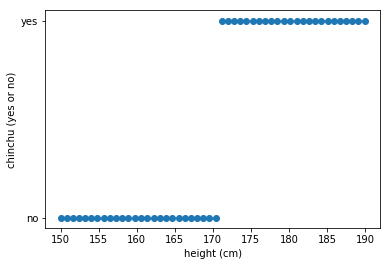

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(height_data, chinchu_data)
plt.xlabel('height (cm)')
plt.ylabel('chinchu (yes or no)')
plt.show()

⚙️ 엔지니어

> 아...  
> 앞에서 배운 '선형 회귀'로는  
> 답이 나올 것 같지 않다...  

## 데이터 변환 (Data Transformation)

키와 친추 데이터를 각각 매트릭스로 변환하자  
 - 열의 크기는 데이터의 개수    
 - 컬럼의 크기는 측정한 항목의 개수    

키 값을 입력하면 '친추'가능 여부(yes or no)를 예측해야 한다. 키 데이터를 입력 x라고 하고 친추 가능 여부를 출력 y라고 하자  

- 키 데이터는 50개의 '키'를 측정한 데이터가 있으므로 50X1 매트릭스   
- 친추 데이터는 50개의 '친추 여부'를 측정한 데이터가 있으므로 50X1 매트릭스이다.  

손실 함수(Loss function)를 계산하기 위해서는 'yes', 'no'를 계산이 가능한 수로 표시해야 한다.   
여기에서는 'yes'와 'no' 두가지의 결과만 있으니까 'yes'를 1로, 'no'를 0으로 변환한다.  

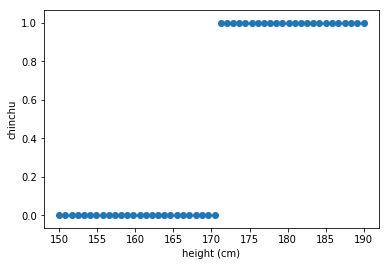

In [3]:
def transform_y(y):
    if y == 'yes':
        return 1
    else:
        return 0

import numpy as np

x = np.array(height_data).reshape(len(height_data), 1)
y = np.array([transform_y(i) for i in chinchu_data ]).reshape(len(chinchu_data), 1)

plt.scatter(x, y)
plt.xlabel('height (cm)')
plt.ylabel('chinchu')
plt.show()

## 로지스틱 모델링 (Logistic Modeling)

⚙️ 엔지니어

> 딱봐도 선형 회귀(Linear Regression)모델링은 답이 아니다...   
> $y=wx+b$ 및 $J(w,b)$, 그리고 경사 하강법(Gradient Descent)을 이용하면서   
> 위와 비슷한 그래프가 나올 수 있는 모델링이  
> 과연 존재할까?

**계단 함수 (step function)**

위의 데이터 분포와 가장 유사한 모양을 가지는 계단 함수를 생각해 보자.  

$y=s_{c}(x)\\
\\
s_{c}(x) = 
\begin{cases}
0, & x < c \\
1, & x \ge c
\end{cases}$



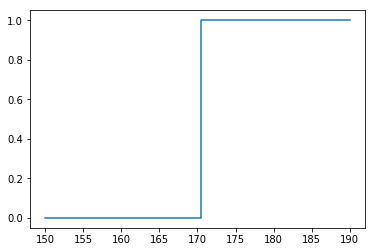

In [4]:
plt.step(x, y)
plt.show()

⚙️ 엔지니어

> 오! 뭔가 그럴싸한데...  
> $z=wx+b$로 놓고  
> $\hat{y}=s_{c}(z)$로 모델링해서  
> $J(w,b)$ 함수를 그려보자  



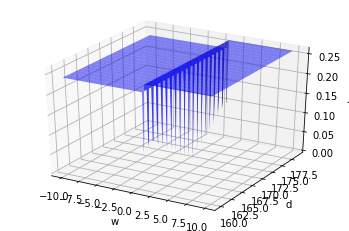

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d

# w,d의 범위를 결정한다.
w = np.arange(-10, 10, 0.1)
d = np.arange(160, 180, 1)
j_array = []

# (20, 200) 매트릭스로 변환한다.
W, D = np.meshgrid(w, d)

# w, b를 하나씩 대응한다.
for we, de in zip(np.ravel(W), np.ravel(D)):
    z_hat = np.multiply(we, x)
    y_list = []
    for ze in z_hat:
        if ze < de:
            y_list.append(0)
        else:
            y_list.append(1)
    y_hat = np.array(y_list)
    # Cost function
    mse = mean_squared_error(y_hat, y) / 2.0
    j_array.append(mse)

# 손실(Loss)을 구하고 (20, 200) 매트릭스로 변환한다.
J = np.array(j_array).reshape(W.shape)

# 서피스 그래프를 그린다.
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_surface(W, D, J, color='b', alpha=0.5)
ax.set_xlabel('w')
ax.set_ylabel('d')
ax.set_zlabel('J')
plt.show()

⚙️ 엔지니어

> 내 이럴줄 알았다...  
> 결론적으로 계단 함수(Step function)는 사용할 수 없다!  
> 왜냐하면...  
>  
> $J(w,b)$가 **미분 불가능** 하기 때문이다!  
>  
> 미분 가능하면서도 계단 함수와 비슷한 함수를 찾아야 한다...  
>  
> 다행히  
> **S라인**의 멋진 함수가 있다!  
>  
> 그것은 바로~

### 시그모이드 함수 (Sigmoid function)

엔지니어들은 미분이 잘 되고 $x$에 어떤 값을 넣어도 0이나 1의 값에 가까운 값을 가지는 함수를 만들어 냈다.  
이것이 시그모이드 함수다.  

$\sigma(x) = {1 \over {1 + e^{-x}}}$



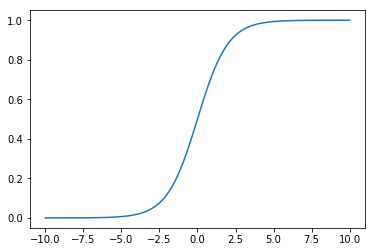

In [6]:
sigmoid = lambda x: 1.0 / (1.0 + np.exp(-x))

xx = np.linspace(-10,10,100)

plt.plot(xx, sigmoid(xx))
plt.show()

⚙️ 엔지니어

> 오! 멋진데...  
> $z=wx+b$로 놓고  
> $\hat{y}=\sigma(z)$로 모델링해서  
> $J(w,b)$ 함수를 그려보자   
>
> 여기서 우리는 새로운 손실 함수(Loss function)를 사용할 것이다.  

### 분류(Classification)를 위한 손실 함수: Cross-entropy Loss

하나의 데이터 세트($x^{(i)}, y^{(i)}$)를 사용해서 모델에서 얻은 값과 실제 값과의 차이(Loss)를 구하는 함수를 구해보자.  
여기서 $x^{(i)}$는 i번째 $x$값이고 $y^{(i)}$은 i번째 $y$값이다.  

일단 $w$와 $b$는 임의의 값으로 놓자. 그리고 모델에 $x^{(i)}$을 넣고 계산한 결과 값 ${\hat y}^{(i)}$과 실제 값 $y^{(i)}$의 차이를 구한다. 로지스틱 모델링에서는 크로스 엔트로피 손실(Cross-entropy loss)을 사용한다.

$L({\hat y}^{(i)}, y^{(i)})=-\bigl (y^{(i)}log({\hat y}^{(i)}) + (1-y^{(i)})log(1-{\hat y}^{(i)})\bigr)$

모든 데이터(m개의 데이터 세트)로 부터 얻은 것을 평균 한것이 손실 함수(Loss function)이다. 손실 함수는 $w$와 $b$의 함수로 나타낼 수 있다.

${\large J}(w, b) = {1\over m}\sum_{i=1}^m L({\hat y}^{(i)}, y^{(i)}) \\
\\
\hspace{2.9em}= -{1\over {m}}\sum_{i=1}^m [(y^{(i)}log({\hat y}^{(i)})) + (1-y^{(i)})log(1-{\hat y}^{(i)})]$

⚙️ 엔지니어

> 이제부터  
> 선형 회귀(Linear regression) 모델에서 사용된 손실 함수인   
> 평균 제곱 오차 (mean squared error)를 사용하지 않고   
> 고양이냐 개냐 토끼냐, Yes or No 등의 분류(Classification) 문제를 위한 손실 함수로서  
> 아래의 손실 함수를 사용한다.  
>
> ${\large J}(w, b) = -{1\over {m}}\sum_{i=1}^m [(y^{(i)}log({\hat y}^{(i)})) + (1-y^{(i)})log(1-{\hat y}^{(i)})]$   
>
> 엔지니어를 갈아서 만든 것이니  
> 우리는 사용하기만 하면 된다  

**손실 함수 (Loss function) 시각화**

⚙️ 엔지니어

> 우선 손실 함수(Loss function)가 어떻게 생겨 먹었는지 살펴 보자.  
> x축을 $w$로 놓고, y축을 $b$로 놓고, z축을 손실 함수 ${\large J}(w, b)$로 
> 그래프를 그려 보면  
> 어떻게 최소값을 찾을지 감이 올 것 같다.   



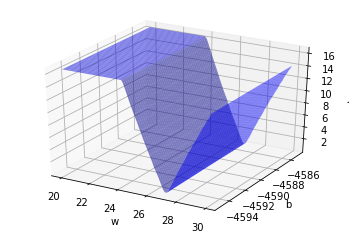

In [7]:
from sklearn.metrics import log_loss

cross_entropy_loss = True

# W,b의 범위를 결정한다.
w = np.arange(20, 30, 0.1)
b = np.arange(-4595, -4585, 0.1)

j_loss = []

# 매트릭스로 변환한다.
W, B = np.meshgrid(w, b)

# w, b를 하나씩 대응한다.
for we, be in zip(np.ravel(W), np.ravel(B)):
    z = np.add(np.multiply(we, x), be)
    y_hat = sigmoid(z)
    # Loss function
    if cross_entropy_loss: 
        loss = log_loss(y, y_hat) # Log loss, aka logistic loss or cross-entropy loss.
        j_loss.append(loss)
    else:
        loss = mean_squared_error(y_hat, y) / 2.0 # Mean squred error
        j_loss.append(loss)

# 손실(Loss)을 구한다.
J = np.array(j_loss).reshape(W.shape)

# 서피스 그래프를 그린다.
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(W, B, J, color='b', alpha=0.5)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J')
plt.show()


⚙️ 엔지니어

> V 모양으로 구부러진 모양이다!  
> $w$가 27근처에서 손실 함수가 최소값을 가지는 것을 볼 수 있다.  
> 
> 손실 함수가 최소가 되는 $w$와 $b$를 빠르게 찾기 위해서   
> 경사 하강법(Gradient Descent)보다 성능이 우수한  
> **RMSProp** 을 사용한다.

### RMSProp

RMSProp의 원리는 급경사인 경우에는 보폭을 낮추어서 가장 아래인지를 세밀히 살피고, 완만한 경사인 경우에는 보폭을 넓혀서 빨리 지나가는 방식이다.  
이 방식은 매우 빠르게 손실 함수의 최소값을 찾을 수 있다.  

$dw = {\partial {J(w,b)}\over \partial w}$,  
$db = {\partial{J(w,b)}\over \partial b}$  

REPEAT(epoch) {    
$w:=w-\alpha {dw \over {\sqrt {S_{dw}} + \epsilon}}$      

$b:=b-\alpha {db \over {\sqrt {S_{db}} + \epsilon}}$   
}  
 
$S_{dw} = \rho S_{dw} + (1-\rho)dw^2$,  
$S_{db} = \rho S_{db} + (1-\rho)db^2$  

$\alpha=0.001$ : learining rate,  
$\rho=0.9$ : discounting factor,  
$\epsilon=1e-07$ : small value to avoid zero denominator

⚙️ 엔지니어

> 이것도 엔지니어를 갈아서 만든 것이니  
> 우리는 사용하기만 하면 된다  

### 정리

로지스틱 모델(Logistic model)을 만드는 방법을 정리해 보자.  

1. $z=wx+b$ 함수를 정의한다.  
2. $a = \sigma(z)$ 함수를 정의한다. $a$를 **활성 함수(activation function)** 라고 한다.  
3. $\hat{y} = a$ 이다.
4. 손실 함수 (Loss function)를 정의한다. 여기서는 **크로스-엔트로피 손실(cross-entropy loss)** 를 사용한다.  
5. 옵티마이저(Optimizer)를 선택한다. 여기서는 **RMSProp**을 사용한다.  
6. 반복할 회수(epoch)를 결정한다.  
7. 주어진 조건으로 모델을 최적화(fit) 시킨다.  

## 케라스(Keras)로 모델링(Modeling)

⚙️ 엔지니어

> 좋았어!   
> 
> **케라스(Keras)**를 이용해서 구현을 해보자!

### 정규화 (Normalization)

`정규값 = (현재값 - 최소값) / (최대값-최소값)` 으로 정규화 한다!  

그래프를 보면,  
데이터의 모양은 그대로 유지하면서도 $x$축의 값이 0에서 1사이로 변환된 것을 볼 수 있다.  

⚙️ 엔지니어  

> 이제 정규화는  
> 선택이 아닌 **필수**!  



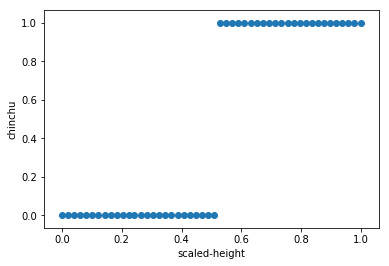

In [8]:
from sklearn import preprocessing

mm_scaler = preprocessing.MinMaxScaler()
X_train = mm_scaler.fit_transform(x)
Y_train = y

plt.scatter(X_train, Y_train)
plt.xlabel('scaled-height')
plt.ylabel('chinchu')
plt.show()

### 모델링 (Modeling)

⚙️ 엔지니어

> 4줄로 모델링이 가능하다!   
> 
> 케라스 만만세!



In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

# 모델을 준비한다.
model = Sequential()

# 입력 변수의 개수가 1이고 출력 개수가 1인 y=sigmoid(wx+b)를 생성한다.
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# Loss funtion과 Optimizer를 선택한다.
model.compile(loss='binary_crossentropy', optimizer='rmsprop') 

# epochs만큼 반복해서 손실값이 최저가 되도록 모델을 훈련한다.
hist = model.fit(X_train, Y_train, epochs=10000, batch_size=20, verbose=0) 

W0901 10:08:24.463013 140371975219008 deprecation.py:506] From /home/dataman/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0901 10:08:24.482560 140371975219008 deprecation.py:323] From /home/dataman/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 손실값의 변화를 그래프로 확인

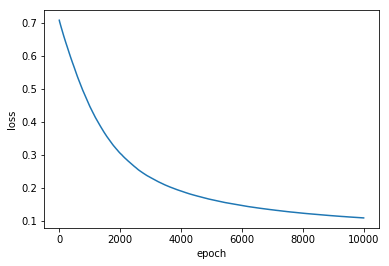

In [10]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

⚙️ 엔지니어

> 반복적으로 학습할 수록 손실(Loss)이 0에 가깝게 된다.  
> 나이스!

### $w$와 $b$값을 확인

In [11]:
w, b = model.get_weights()
w =  w[0][0]
b = b[0]
print('w: ', w)
print('b: ', b)

w:  14.712823
b:  -7.5659995


### 그래프로 확인

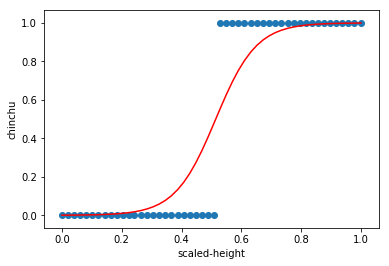

In [12]:
x_scale = mm_scaler.transform(x)
plt.scatter(x_scale, y)
plt.plot(x_scale, sigmoid(w*np.array(x_scale)+b), 'r')
plt.xlabel('scaled-height')
plt.ylabel('chinchu')
plt.show()

## 해결 (Solution)

⚙️ 엔지니어  

> 고객님~ 원하시는 솔루션입니다.   
> input_height에 원하시는 키를 입력하시면    
> '친추'가 될 확률을 알려 줍니다.



In [14]:
input_height = 178.0

input_x = mm_scaler.transform(np.array([input_height]).reshape(-1, 1))
predict = model.predict(input_x)

print('친추가 될 확률은 {:.1f}% 입니다.'.format(predict[0][0]*100))

친추가 될 확률은 93.9% 입니다.
